# Managing Projections

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
us = gpd.read_file(r"C:\Users\wtdud\Geopandas\TN.gdb\county.shp")

In [7]:
us.crs

<Projected CRS: ESRI:102008>
Name: North_America_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Text(0.5, 1.0, 'WGS84 (lat/lon)')

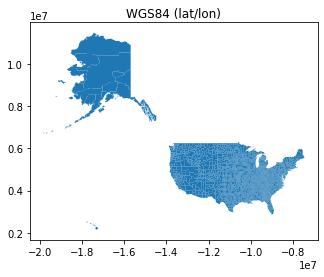

In [23]:
ax = us.plot()
ax.set_title("WGS84 (lat/lon)")

In [11]:
us.head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,AREA,POP1990,POP1999,POP90_SQMI,HOUSEHOLDS,...,UNITS2,UNITS3_9,UNITS10_49,UNITS50_UP,MOBILEHOME,NO_FARMS87,AVG_SIZE87,CROP_ACR87,AVG_SALE87,geometry
0,Lake of the Woods,Minnesota,27,077,27077,1784.0634,4076,4597,2,1576,...,24,29,80,0,937,222,536,83787,27958,"POLYGON ((45826.359 1009373.236, 45812.496 102..."
1,Ferry,Washington,53,019,53019,2280.2319,6295,7150,3,2247,...,40,51,44,0,936,218,3489,29482,22155,"POLYGON ((-1594929.668 1132044.783, -1579851.9..."
2,Stevens,Washington,53,065,53065,2529.9794,30948,39965,12,11241,...,133,324,264,0,3264,1073,490,131700,18138,"POLYGON ((-1495568.872 1119855.241, -1502676.9..."
3,Okanogan,Washington,53,047,53047,5306.1800,33350,38596,6,12654,...,346,816,286,0,3431,1476,907,144053,71970,"POLYGON ((-1603467.191 1132885.585, -1603029.3..."
4,Pend Oreille,Washington,53,051,53051,1445.0286,8915,11788,6,3395,...,41,97,89,0,1185,227,276,22923,10367,"POLYGON ((-1470317.684 1229524.004, -1442899.8..."


In [18]:
# Again, I can't figure out how to drop them
# us = us[(["STATE_NAME"] != "Hawaii") & (["STATE_NAME"] != "Alaska")]

Text(0.5, 1.0, 'Mercator')

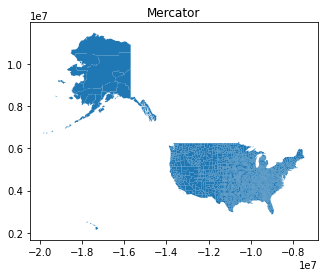

In [22]:
us = us.to_crs("EPSG:3395")
ax = us.plot()
ax.set_title("Mercator")

# Geometric Manipulations

In [45]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from geopandas import GeoSeries
from shapely.geometry import Polygon
p1 = Polygon([(0, 0), (1, 0), (1, 1)])
p2 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])
g = GeoSeries([p1, p2, p3])
g

0    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
1    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
2    POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....
dtype: geometry

<AxesSubplot:>

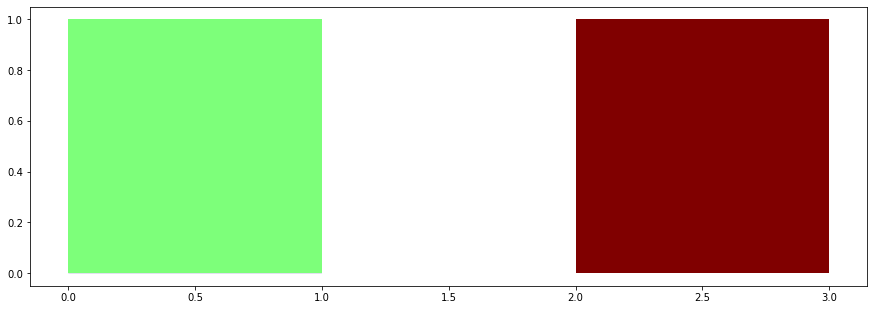

In [46]:
g.plot(cmap="jet", figsize=(15,15))

In [47]:
print(g.area)

0    0.5
1    1.0
2    1.0
dtype: float64


<AxesSubplot:>

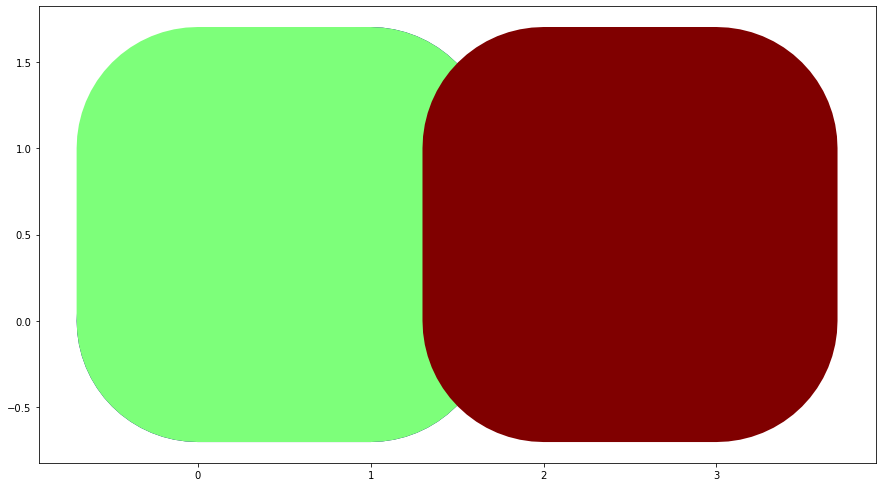

In [48]:
g.buffer(0.7).plot(cmap="jet", figsize=(15,15))

In [97]:
import fiona as fio
parks = gpd.read_file(r"C:\Users\wtdud\Geopandas\Shelby.gdb\Shelby.gdb", layer="Parks_shelby")

In [98]:
parks.set_index("NAME", inplace=True)
parks.sort_index(inplace=True)
parks

,PERMANENT_IDENTIFIER,PARKING_AREA,PARKING_SURFMAT,Shape_Length,Shape_Area,geometry
NAME,,,,,,
A. E. Beaty Park,CPGIS47157031120131243215,0.00,,1967.825796,2.320483e+05,"MULTIPOLYGON (((834036.931 349496.158, 834036...."
Alcy-Samuels Park,CPGIS47157031120131243156,10374.79,Paved,3377.681457,6.461645e+05,"MULTIPOLYGON (((774416.589 296157.881, 774454...."
Alcy-Warren Park,CPGIS47157031120131243159,0.00,,3357.442992,5.844900e+05,"MULTIPOLYGON (((767278.154 295663.972, 767256...."
American Way Park,CPGIS47157031120131243161,43075.60,Paved,7990.414795,1.103775e+06,"MULTIPOLYGON (((797859.750 292152.156, 797861...."
Arlington Sports Complex,CPGIS47157031120131243184,101288.36,Paved,5870.328099,1.989904e+06,"MULTIPOLYGON (((869511.157 364791.240, 869510...."
...,...,...,...,...,...,...
Wilson Park,CPGIS47157031120131243279,0.00,,2782.028606,4.830572e+05,"MULTIPOLYGON (((808924.063 290675.063, 808867...."
Winchester Park,CPGIS47157031120131243113,0.00,,2349.536185,2.635370e+05,"MULTIPOLYGON (((762289.094 323235.872, 762495...."
Winward Slope Park,CPGIS47157031120131243192,8728.90,Paved,3013.039360,4.175897e+05,"MULTIPOLYGON (((853238.039 346984.615, 853326...."


<AxesSubplot:>

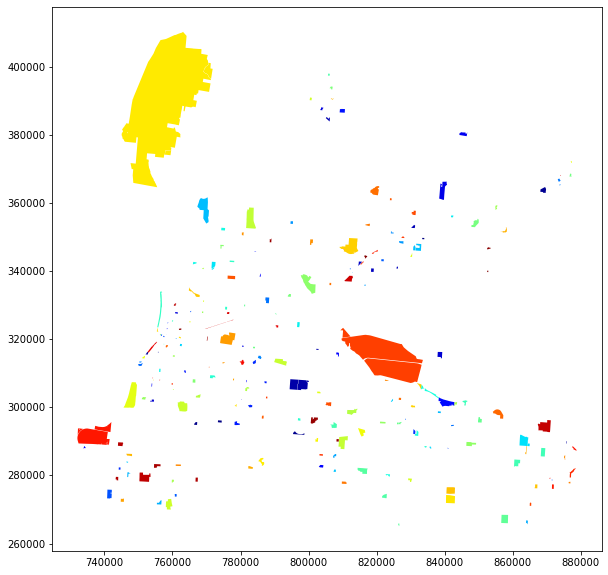

In [99]:
parks.plot(cmap="jet", figsize=(10,10))

<AxesSubplot:>

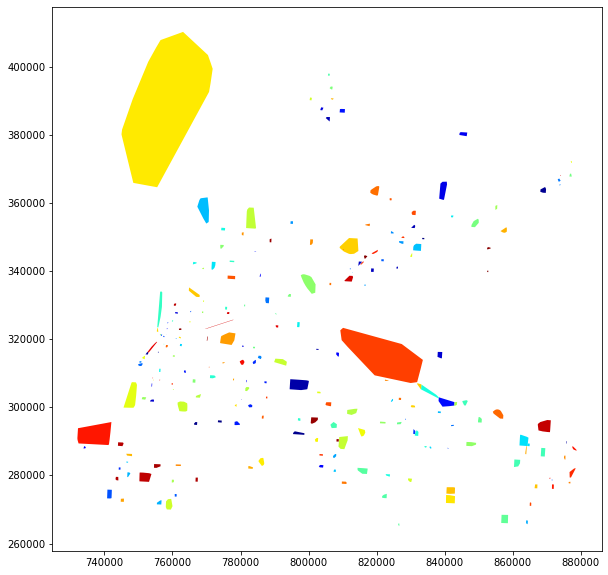

In [100]:
parks['geometry'].convex_hull.plot(cmap="jet", figsize=(10,10))

In [104]:
# I kept receiving messages about the object not being callable. I tried to set geometry, change indices, xmin and ymin, etc.
# I got something related to what it should be, just not all there
import numpy as np
from shapely.geometry import Point
geom = parks.set_geometry("geometry")
xmin, xmax, ymin, ymax = 700000, 1000000, 300000, 1000000
xc = (xmax - xmin) * np.random.random(2000) + xmin
yc = (ymax - ymin) * np.random.random(2000) + ymin
pts = GeoSeries([Point(x, y) for x, y in zip(xc, yc)])

In [105]:
circles = pts.buffer(2000)
mp = circles.unary_union
holes = parks('geometry').intersection(mp)

TypeError: 'GeoDataFrame' object is not callable

<AxesSubplot:>

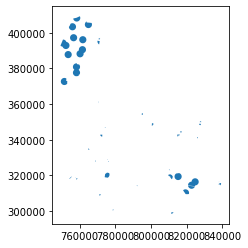

In [106]:
holes.plot()

In [107]:
parks_holes = parks['geometry'].difference(mp)

<AxesSubplot:>

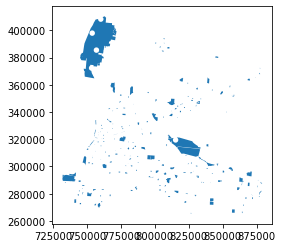

In [109]:
parks_holes.plot()

In [112]:
# This will not work because the holes variable still is not all there
holes.area / parks.geometry.area

NAME
A. E. Beaty Park                0.0
Alcy-Samuels Park               0.0
Alcy-Warren Park                0.0
American Way Park               0.0
Arlington Sports Complex        0.0
                               ... 
Wilson Park                     0.0
Winchester Park                 0.0
Winward Slope Park              0.0
Yale Road Park                  1.0
Zadie E. Kuehl Memorial Park    0.0
Length: 226, dtype: float64

# Set-Operations with Overlay

In [140]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

In [143]:
shelby = gpd.read_file(r"C:\Users\wtdud\Geopandas\Shelby.gdb\Shelby.gdb", layer="County_shelby")
parks = gpd.read_file(r"C:\Users\wtdud\Geopandas\Shelby.gdb\Shelby.gdb", layer="Parks_shelby")

<AxesSubplot:>

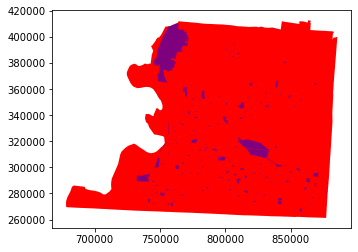

In [145]:
# Not great examples in this file, but parks are purple because of the intersection
ax = shelby.plot(color="red")
parks.plot(ax=ax, color="blue", alpha=0.5)

In [147]:
union = shelby.overlay(parks, how='union')
union

,PERMANENT_IDENTIFIER_1,SOURCE_FEATUREID,SOURCE_DATASETID,SOURCE_DATADESC,STATEFP10,COUNTYFP10,COUNTYNS10,GEOID10,NAME10,NAMELSAD10,...,INTPTLON10,SHAPE_Length,SHAPE_Area,PERMANENT_IDENTIFIER_2,NAME,PARKING_AREA,PARKING_SURFMAT,Shape_Length,Shape_Area,geometry
0,USCB47157011320121651157,157,USCB,United States Census Bureau,47,157,01639790,47157,Shelby,Shelby County,...,-089.8953970,774016.890658,2.188561e+10,CPGIS47157031120131243109,University Park,9033.50,Paved,2393.485883,3.565381e+05,"POLYGON ((776686.125 327567.844, 776594.826 32..."
1,USCB47157011320121651157,157,USCB,United States Census Bureau,47,157,01639790,47157,Shelby,Shelby County,...,-089.8953970,774016.890658,2.188561e+10,CPGIS4715703112013124386,Jameson Park,30074.22,Gravel,3135.316269,4.786450e+05,"POLYGON ((807036.813 393864.688, 807036.688 39..."
2,USCB47157011320121651157,157,USCB,United States Census Bureau,47,157,01639790,47157,Shelby,Shelby County,...,-089.8953970,774016.890658,2.188561e+10,CPGIS47157031120131243102,Rodney Baber Park,60896.80,Paved,6289.457152,2.048794e+06,"POLYGON ((777353.375 338706.375, 777354.343 33..."
3,USCB47157011320121651157,157,USCB,United States Census Bureau,47,157,01639790,47157,Shelby,Shelby County,...,-089.8953970,774016.890658,2.188561e+10,CPGIS4715703112013124395,Carver Heights Park,2175.15,Paved,1168.085684,4.716391e+04,"POLYGON ((784579.563 345831.938, 784416.208 34..."
4,USCB47157011320121651157,157,USCB,United States Census Bureau,47,157,01639790,47157,Shelby,Shelby County,...,-089.8953970,774016.890658,2.188561e+10,CPGIS4715703112013124397,George Alberson Park,10897.11,Paved,3131.762349,5.059772e+05,"POLYGON ((765990.438 342062.688, 766114.083 34..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,USCB47157011320121651157,157,USCB,United States Census Bureau,47,157,01639790,47157,Shelby,Shelby County,...,-089.8953970,774016.890658,2.188561e+10,CPGIS47157031120131243288,Tom Brooks Park,42179.20,Paved,1108.782381,6.040495e+04,"POLYGON ((871109.258 279210.863, 871104.747 27..."
224,USCB47157011320121651157,157,USCB,United States Census Bureau,47,157,01639790,47157,Shelby,Shelby County,...,-089.8953970,774016.890658,2.188561e+10,CPGIS47157031120131243280,Williamson Park,22965.38,Paved,2812.508994,1.955156e+05,"POLYGON ((770225.555 319615.589, 770145.657 31..."
225,USCB47157011320121651157,157,USCB,United States Census Bureau,47,157,01639790,47157,Shelby,Shelby County,...,-089.8953970,774016.890658,2.188561e+10,CPGIS47157031120131243247,Chandler Park,0.00,None,2488.935942,2.884105e+05,"POLYGON ((763876.262 310144.795, 763828.762 31..."
226,USCB47157011320121651157,157,USCB,United States Census Bureau,47,157,01639790,47157,Shelby,Shelby County,...,-089.8953970,774016.890658,2.188561e+10,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((883692.394 399567.961, 883909...."


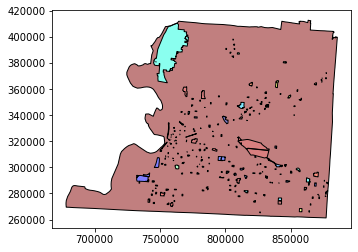

In [149]:
ax = union.plot(alpha=0.5, cmap='jet')
shelby.plot(ax=ax, facecolor='none', edgecolor='k');
parks.plot(ax=ax, facecolor='none', edgecolor='k');

In [150]:
inter = shelby.overlay(parks, how='intersection')
inter

,PERMANENT_IDENTIFIER_1,SOURCE_FEATUREID,SOURCE_DATASETID,SOURCE_DATADESC,STATEFP10,COUNTYFP10,COUNTYNS10,GEOID10,NAME10,NAMELSAD10,...,INTPTLON10,SHAPE_Length,SHAPE_Area,PERMANENT_IDENTIFIER_2,NAME,PARKING_AREA,PARKING_SURFMAT,Shape_Length,Shape_Area,geometry
0,USCB47157011320121651157,157,USCB,United States Census Bureau,47,157,01639790,47157,Shelby,Shelby County,...,-089.8953970,774016.890658,2.188561e+10,CPGIS47157031120131243109,University Park,9033.50,Paved,2393.485883,3.565381e+05,"POLYGON ((776686.125 327567.844, 776594.826 32..."
1,USCB47157011320121651157,157,USCB,United States Census Bureau,47,157,01639790,47157,Shelby,Shelby County,...,-089.8953970,774016.890658,2.188561e+10,CPGIS4715703112013124386,Jameson Park,30074.22,Gravel,3135.316269,4.786450e+05,"POLYGON ((807036.813 393864.688, 807036.688 39..."
2,USCB47157011320121651157,157,USCB,United States Census Bureau,47,157,01639790,47157,Shelby,Shelby County,...,-089.8953970,774016.890658,2.188561e+10,CPGIS47157031120131243102,Rodney Baber Park,60896.80,Paved,6289.457152,2.048794e+06,"POLYGON ((777353.375 338706.375, 777354.343 33..."
3,USCB47157011320121651157,157,USCB,United States Census Bureau,47,157,01639790,47157,Shelby,Shelby County,...,-089.8953970,774016.890658,2.188561e+10,CPGIS4715703112013124395,Carver Heights Park,2175.15,Paved,1168.085684,4.716391e+04,"POLYGON ((784579.563 345831.938, 784416.208 34..."
4,USCB47157011320121651157,157,USCB,United States Census Bureau,47,157,01639790,47157,Shelby,Shelby County,...,-089.8953970,774016.890658,2.188561e+10,CPGIS4715703112013124397,George Alberson Park,10897.11,Paved,3131.762349,5.059772e+05,"POLYGON ((765990.438 342062.688, 766114.083 34..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,USCB47157011320121651157,157,USCB,United States Census Bureau,47,157,01639790,47157,Shelby,Shelby County,...,-089.8953970,774016.890658,2.188561e+10,CPGIS47157031120131243208,W. J. Freeman Park,107347.89,Paved,7060.628147,2.711945e+06,"POLYGON ((812706.438 337011.656, 812631.351 33..."
222,USCB47157011320121651157,157,USCB,United States Census Bureau,47,157,01639790,47157,Shelby,Shelby County,...,-089.8953970,774016.890658,2.188561e+10,CPGIS47157031120131243220,Mike Rose Soccer Park,238359.09,Paved,9662.443896,5.927148e+06,"POLYGON ((842973.579 271816.227, 842705.705 27..."
223,USCB47157011320121651157,157,USCB,United States Census Bureau,47,157,01639790,47157,Shelby,Shelby County,...,-089.8953970,774016.890658,2.188561e+10,CPGIS47157031120131243288,Tom Brooks Park,42179.20,Paved,1108.782381,6.040495e+04,"POLYGON ((871109.258 279210.863, 871104.747 27..."
224,USCB47157011320121651157,157,USCB,United States Census Bureau,47,157,01639790,47157,Shelby,Shelby County,...,-089.8953970,774016.890658,2.188561e+10,CPGIS47157031120131243280,Williamson Park,22965.38,Paved,2812.508994,1.955156e+05,"POLYGON ((770225.555 319615.589, 770145.657 31..."


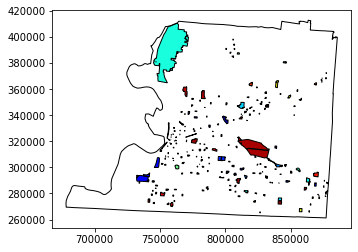

In [151]:
# Bad example
ax = inter.plot(cmap='jet')
shelby.plot(ax=ax, facecolor='none', edgecolor='k');
parks.plot(ax=ax, facecolor='none', edgecolor='k');

In [152]:
symdif = shelby.overlay(parks, how='symmetric_difference')
symdif

,PERMANENT_IDENTIFIER_1,SOURCE_FEATUREID,SOURCE_DATASETID,SOURCE_DATADESC,STATEFP10,COUNTYFP10,COUNTYNS10,GEOID10,NAME10,NAMELSAD10,...,INTPTLON10,SHAPE_Length,SHAPE_Area,PERMANENT_IDENTIFIER_2,NAME,PARKING_AREA,PARKING_SURFMAT,Shape_Length,Shape_Area,geometry
0,USCB47157011320121651157,157,USCB,United States Census Bureau,47,157,01639790,47157,Shelby,Shelby County,...,-089.8953970,774016.890658,2.188561e+10,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((883692.394 399567.961, 883909...."
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,CPGIS4715703112013124387,Meeman-Shelby Forest State Park,252631.36,Paved,182282.32435,5.869442e+08,"POLYGON ((760617.818 409500.576, 760617.818 40..."


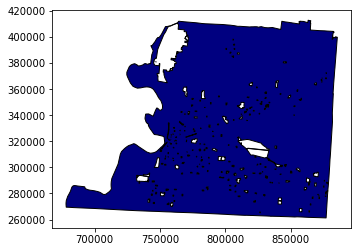

In [153]:
ax = symdif.plot(cmap='jet')
shelby.plot(ax=ax, facecolor='none', edgecolor='k');
parks.plot(ax=ax, facecolor='none', edgecolor='k');

In [154]:
diff = shelby.overlay(parks, how='difference')
diff

,PERMANENT_IDENTIFIER,SOURCE_FEATUREID,SOURCE_DATASETID,SOURCE_DATADESC,STATEFP10,COUNTYFP10,COUNTYNS10,GEOID10,NAME10,NAMELSAD10,...,CBSAFP10,METDIVFP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,SHAPE_Length,SHAPE_Area,geometry
0,USCB47157011320121651157,157,USCB,United States Census Bureau,47,157,01639790,47157,Shelby,Shelby County,...,32820,,A,1.976612e+09,56576401.0,+35.1837942,-089.8953970,774016.890658,2.188561e+10,"MULTIPOLYGON (((883692.394 399567.961, 883909...."


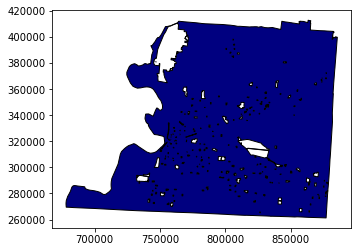

In [157]:
ax = diff.plot(cmap='jet')
shelby.plot(ax=ax, facecolor='none', edgecolor='k');
parks.plot(ax=ax, facecolor='none', edgecolor='k');

In [160]:
# I found a capitals dataset to better display this example
us = gpd.read_file(r"C:\Users\wtdud\Geopandas\TN.gdb\county.shp")
caps = gpd.read_file(r"C:\Users\wtdud\Geopandas\us_state_capitals.shp\us_state_capitals.shp")

In [167]:
caps.head()
us.head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,AREA,POP1990,POP1999,POP90_SQMI,HOUSEHOLDS,...,UNITS2,UNITS3_9,UNITS10_49,UNITS50_UP,MOBILEHOME,NO_FARMS87,AVG_SIZE87,CROP_ACR87,AVG_SALE87,geometry
0,Lake of the Woods,Minnesota,27,077,27077,1784.0634,4076,4597,2,1576,...,24,29,80,0,937,222,536,83787,27958,"POLYGON ((-10613515.991 6166248.177, -10613318..."
1,Ferry,Washington,53,019,53019,2280.2319,6295,7150,3,2247,...,40,51,44,0,936,218,3489,29482,22155,"POLYGON ((-13230502.885 6066723.134, -13230150..."
2,Stevens,Washington,53,065,53065,2529.9794,30948,39965,12,11241,...,133,324,264,0,3264,1073,490,131700,18138,"POLYGON ((-13073231.112 6082405.174, -13084737..."
3,Okanogan,Washington,53,047,53047,5306.1800,33350,38596,6,12654,...,346,816,286,0,3431,1476,907,144053,71970,"POLYGON ((-13243912.995 6064998.098, -13244132..."
4,Pend Oreille,Washington,53,051,53051,1445.0286,8915,11788,6,3395,...,41,97,89,0,1185,227,276,22923,10367,"POLYGON ((-13073202.961 6242582.388, -13027948..."


<AxesSubplot:>

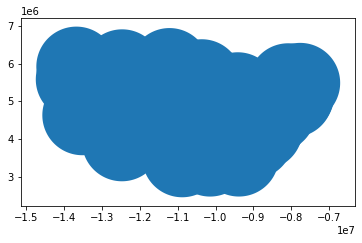

In [185]:
# Not sure why it keeps doing this same thing
caps['geometry']= caps.buffer()
caps.plot()

<AxesSubplot:>

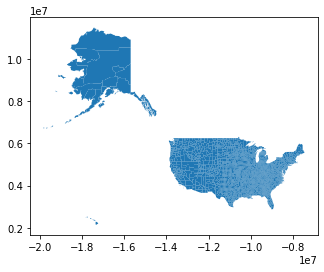

In [179]:
us.plot()

# Aggregation with Dissolve

In [186]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [192]:
us = gpd.read_file(r"C:\Users\wtdud\Geopandas\TN.gdb\county.shp")
us.head

<bound method NDFrame.head of                                  NAME  STATE_NAME STATE_FIPS CNTY_FIPS   FIPS  \
0                   Lake of the Woods   Minnesota         27       077  27077   
1                               Ferry  Washington         53       019  53019   
2                             Stevens  Washington         53       065  53065   
3                            Okanogan  Washington         53       047  53047   
4                        Pend Oreille  Washington         53       051  53051   
...                               ...         ...        ...       ...    ...   
3135              Wrangell-Petersburg      Alaska         02       280  02280   
3136                Ketchikan Gateway      Alaska         02       130  02130   
3137  Prince of Wales-Outer Ketchikan      Alaska         02       201  02201   
3138                   Aleutians East      Alaska         02       013  02013   
3139                   Aleutians West      Alaska         02       016  02016  

,geometry
STATE_NAME,
Alabama,"POLYGON ((766416.027 -1033544.147, 767602.555 ..."
Alaska,"MULTIPOLYGON (((-3210016.447 3003545.501, -321..."
Arizona,"POLYGON ((-1554617.775 -789712.642, -1676669.3..."
Arkansas,"POLYGON ((224370.832 -815533.239, 221448.913 -..."
California,"MULTIPOLYGON (((-2169044.213 -103365.823, -216..."


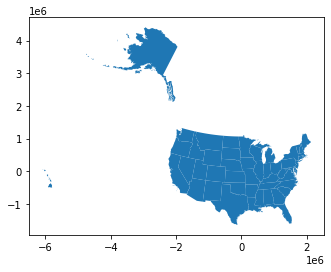

In [190]:
us = us[['STATE_NAME', 'geometry']]
states = us.dissolve(by='STATE_NAME')
states.plot()
states.head()
# Changed from counties to states

In [191]:
us.head()

,STATE_NAME,geometry
0,Minnesota,"POLYGON ((45826.359 1009373.236, 45812.496 102..."
1,Washington,"POLYGON ((-1594929.668 1132044.783, -1579851.9..."
2,Washington,"POLYGON ((-1495568.872 1119855.241, -1502676.9..."
3,Washington,"POLYGON ((-1603467.191 1132885.585, -1603029.3..."
4,Washington,"POLYGON ((-1470317.684 1229524.004, -1442899.8..."


,geometry,POP1999
STATE_NAME,,
Alabama,"POLYGON ((766416.027 -1033544.147, 767602.555 ...",4382953
Alaska,"MULTIPOLYGON (((-3210016.447 3003545.501, -321...",620685
Arizona,"POLYGON ((-1554617.775 -789712.642, -1676669.3...",4790311
Arkansas,"POLYGON ((224370.832 -815533.239, 221448.913 -...",2557924
California,"MULTIPOLYGON (((-2169044.213 -103365.823, -216...",33090214


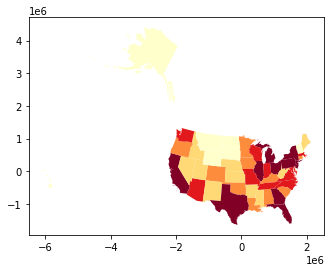

In [202]:
# To refresh the data
us = gpd.read_file(r"C:\Users\wtdud\Geopandas\TN.gdb\county.shp")
us = us[['STATE_NAME', 'geometry', "POP1999"]]
states = us.dissolve(by='STATE_NAME', aggfunc='sum')
states.plot(column = 'POP1999', scheme='quantiles', cmap='YlOrRd');
states.head()

# Merging Data

In [204]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
us = gpd.read_file(r"C:\Users\wtdud\Geopandas\TN.gdb\county.shp")
caps = caps = gpd.read_file(r"C:\Users\wtdud\Geopandas\us_state_capitals.shp\us_state_capitals.shp")

In [212]:
states = us[['geometry', 'STATE_NAME']]
states = states.rename(columns={'STATE_NAME':'state'})

In [213]:
join = us.geometry.append(caps.geometry)

In [215]:
tx = us[us.states == 'Texas']
ok = us[us.states == 'Oklahoma']
oktx = tx.append(ok)

AttributeError: 'GeoDataFrame' object has no attribute 'states'

In [216]:
## I worked with spatial join on the police data assignment

# Geocoding

In [217]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
parks = gpd.read_file(r"C:\Users\wtdud\Geopandas\Shelby.gdb\Shelby.gdb", layer="Parks_shelby")

In [218]:
parks.head()

,PERMANENT_IDENTIFIER,NAME,PARKING_AREA,PARKING_SURFMAT,Shape_Length,Shape_Area,geometry
0,CPGIS47157031120131243109,University Park,9033.50,Paved,2393.485883,3.565381e+05,"MULTIPOLYGON (((776705.299 327806.976, 776686...."
1,CPGIS4715703112013124386,Jameson Park,30074.22,Gravel,3135.316269,4.786450e+05,"MULTIPOLYGON (((807036.999 393865.656, 807036...."
2,CPGIS47157031120131243102,Rodney Baber Park,60896.80,Paved,6289.457152,2.048794e+06,"MULTIPOLYGON (((777352.361 338706.391, 777353...."
3,CPGIS4715703112013124395,Carver Heights Park,2175.15,Paved,1168.085684,4.716391e+04,"MULTIPOLYGON (((784583.625 345930.156, 784579...."
4,CPGIS4715703112013124397,George Alberson Park,10897.11,Paved,3131.762349,5.059772e+05,"MULTIPOLYGON (((766031.752 342090.866, 765990...."


In [222]:
parks_locations = gpd.tools.geocode(parks)

ModuleNotFoundError: No module named 'geopy'

In [223]:
# geopy not here and hard to apply the instructions